In [87]:
import math
from frc3223_azurite.conversions import (
    g, 
    lbs_to_kg, 
    kg_to_lbs,
    meter_to_inch,
    inch_to_meter
)
from frc3223_azurite.motors import neo

arm_mass     = lbs_to_kg(10)  # 10 lbs, but in kg
grabber_mass = lbs_to_kg(4)  # 4 lbs, but in kg
gear_ratio = 80
spring_spur_length = inch_to_meter(3)
spring_h_length = inch_to_meter(15) # m 
spring_constant = 845 #299
motor = neo
motor_count = 1

arm_cog_retracted = 0.3 # m
arm_length_retracted = 0.7 # m
arm_cog_extended = 0.6
arm_length_extended = 2 # m
arm_inertia_retracted = 0.396 # m^2 kg
arm_inertia_extended = 1.13 # m^2 kg

printing = False
def printy(*args, **kwargs):
    if printing:
        print(*args, **kwargs)

def calcaccel(V, motor_velocity, arm_length, arm_inertia, arm_cog, theta):
    torque_at_motor = motor.torque_at_speed_and_voltage(motor_velocity, V)
    current = motor.current_at_torque(torque_at_motor)
    printy ("current: ", current)
    printy ("torque at motor: ", torque_at_motor)
    moment_of_inertia = arm_length**2 * grabber_mass + arm_inertia
    printy ("inertia: ", moment_of_inertia)
    accel_at_joint = (motor_count * gear_ratio * torque_at_motor + spring_torque(theta) - gravity_torque(arm_length, arm_cog, theta)) / moment_of_inertia
    printy ("accel at joint: ", accel_at_joint)
    accel_at_motor = accel_at_joint * gear_ratio
    printy("accel at motor: ", accel_at_motor)
    return accel_at_motor
def gravity_torque(arm_length, arm_cog, theta):
    return g * (arm_length * grabber_mass + arm_cog * arm_mass) * math.sin(theta)
def spring_torque(theta):
    return spring_spur_length * spring_h_length * spring_constant * math.sin(theta)
    return 0

def clamp_velocity(v):
    if v < -motor.free_speed:
        return -motor.free_speed
    if v > motor.free_speed:
        return motor.free_speed
    return v

from matplotlib import pyplot as plt
def plot_position(ts, xs, label):
    plt.plot(ts, xs)
    plt.xlabel("time (s)")
    plt.ylabel(label)
    plt.show()
    
a = gravity_torque(arm_length_retracted, arm_cog_retracted, math.pi/2) / spring_spur_length / spring_h_length
print("a spring constant of %f N/m would be nice!" % a)
b = a * (1./39.4) # m -> in
b = b * (0.225) # N -> lbs
print(" (%f lbs/in)" % b)

a1 = gravity_torque(arm_length_extended, arm_cog_extended, math.pi/2)
a2 = gravity_torque(arm_length_retracted, arm_cog_retracted, math.pi/2)
print("torque extended: %f Nm, retracted: %f Nm" % (a1, a2))

a spring constant of 888.976130 N/m would be nice!
 (5.076640 lbs/in)
torque extended: 62.297424 Nm, retracted: 25.808933 Nm


In [93]:
t = 0
dt = 0.02

voltage = 10  # volts
motor_velocity = 0 # rad/s
joint_theta = 0 # rad



times = []
velocities = []
thetas = []
accelerations = []
currents = []

count = 0

while joint_theta < math.pi/2:
    t += dt
    accel = calcaccel(voltage, motor_velocity, arm_length_retracted, arm_inertia_retracted, arm_cog_retracted, joint_theta)
    current = (voltage - motor_velocity * velocity_constant ) / resistance
    motor_velocity = clamp_velocity(motor_velocity + accel * dt)
    printy("motor velocity: ", motor_velocity)
    dmotor_theta = motor_velocity * dt
    djoint_theta = dmotor_theta / gear_ratio
    joint_theta += djoint_theta
    times.append(t)
    accelerations.append(accel)
    velocities.append(motor_velocity)
    thetas.append(joint_theta / math.pi * 180)
    currents.append(current)
    count += 1
    if printing and count > 3: break
    



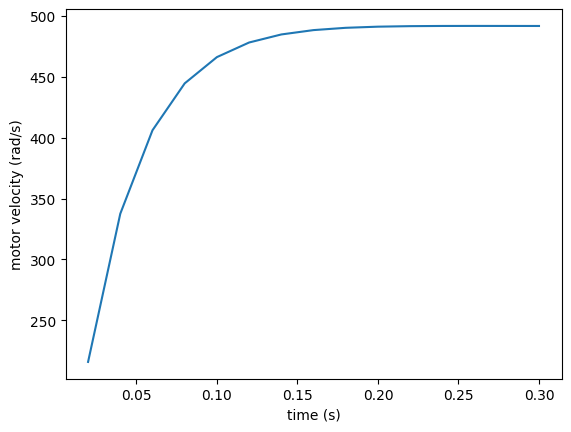

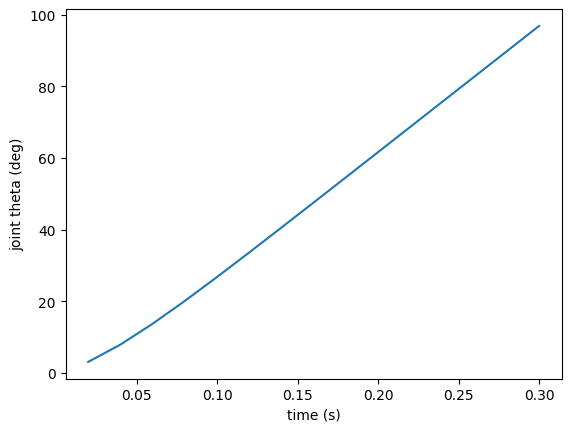

In [94]:
plot_position(times, velocities, "motor velocity (rad/s)")
plot_position(times, thetas, "joint theta (deg)")

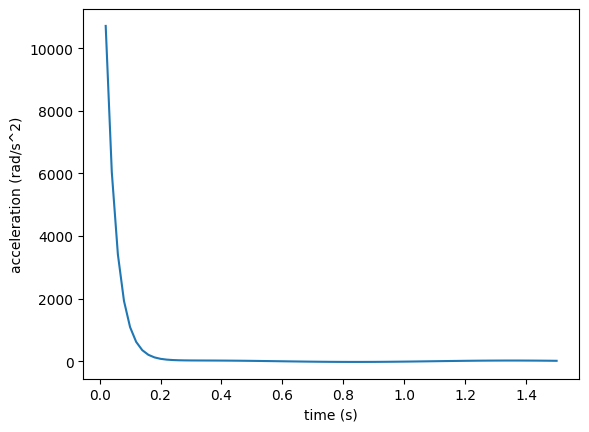

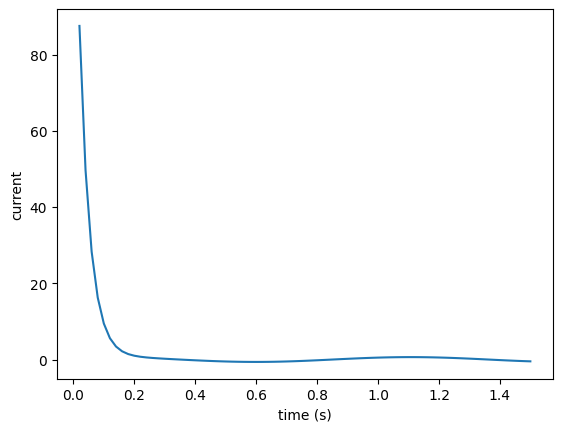

In [92]:
plot_position(times,accelerations, "acceleration (rad/s^2)")
plot_position(times, currents, "current")

In [82]:

#plot_position(velocities, "motor velocity (rad/s)")
#plot_position(thetas, "joint theta (deg)")
#plot_position(accelerations, "acceleration (rad/s^2)")


In [83]:
#plot_position(times, currents, "current (A)")
#print('final current: %f A' % current)

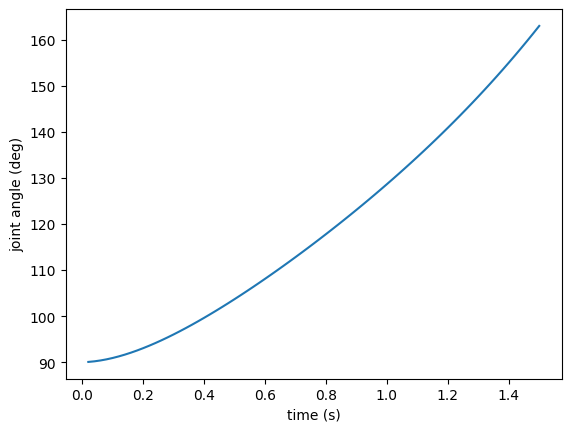

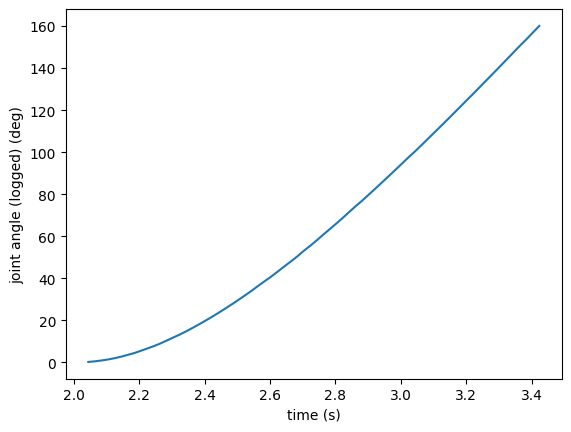

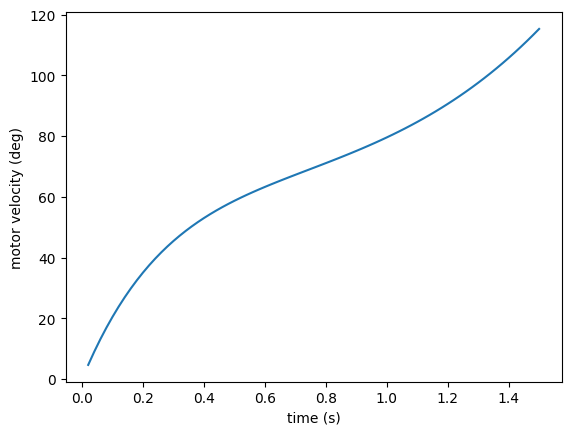

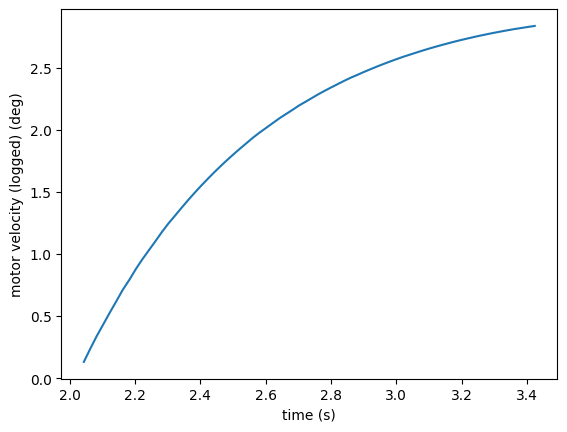

In [84]:
import csv

with open('logs.csv') as f:
    r = csv.reader(f)
    rows = [row for row in r];
#print (rows)
logged_times = [float(row[0]) for row in rows[1:]]
logged_velocities = [float(row[1]) for row in rows[1:]]
logged_thetas = [float(row[2]) for row in rows[1:]]
logged_currents = [float(row[4]) for row in rows[1:]]

plot_position(times, thetas, "joint angle (deg)")
plot_position(logged_times, logged_thetas, "joint angle (logged) (deg)")

plot_position(times, velocities, "motor velocity (deg)")
plot_position(logged_times, logged_velocities, "motor velocity (logged) (deg)")


#plot_position(times, currents, "current")
#plot_position(logged_times, logged_currents, "current (logged)")